# Week 9 Tasks — Data Mining with Python

This notebook demonstrates fundamental data mining techniques including association rule mining, clustering, classification, and anomaly detection.

**Author:** Tran Anh Chuong  
**Date:** [Current Date]


## Load Required Libraries


In [2]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data mining algorithms
from sklearn.cluster import KMeans, DBSCAN
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.decomposition import PCA

# Association rule mining
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set plotting style
sns.set_theme(style='whitegrid')
%matplotlib inline

print("Libraries loaded successfully!")


Libraries loaded successfully!


---

## Task 1 — Association Rule Mining

In this task, we'll discover frequent itemsets and generate association rules from transactional data.


### Load Transactional Dataset


In [3]:
# TODO: Load your transactional dataset
# Example: Market basket data should be in a format where each row represents a transaction
# and contains items purchased together

# For demonstration, create sample transactional data
# Replace this with your actual dataset loading
transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Bread'],
    ['Bread', 'Butter', 'Eggs'],
    ['Milk', 'Eggs'],
    ['Bread', 'Butter'],
    # Add more transactions...
]

print(f"Number of transactions: {len(transactions)}")

import pandas as pd

# Define the file path
file_path = "marketBasket.csv"

# Attempt to read the CSV file, specifying the delimiter and decimal separator
try:
    # Read the CSV file
    # Delimiter is ';', decimal separator is ','
    # Parse 'Date' column as dates, specifying dayfirst=True
    df = pd.read_csv(
        file_path,
        delimiter=';',
        decimal=',',
        parse_dates=['Date'],
        dayfirst=True
    )

    # Display the first 5 rows
    print("DataFrame Head:")
    print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

    # Display DataFrame info
    print("\nDataFrame Info:")
    df.info()

except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Number of transactions: 5
DataFrame Head:
| BillNo   | Itemname                            | Quantity   | Date                | Price   | CustomerID   | Country        |
|:---------|:------------------------------------|:-----------|:--------------------|:--------|:-------------|:---------------|
| 536365   | WHITE HANGING HEART T-LIGHT HOLDER  | 6          | 2010-12-01 08:26:00 | 2.55    | 17850        | United Kingdom |
| 536365   | WHITE METAL LANTERN                 | 6          | 2010-12-01 08:26:00 | 3.39    | 17850        | United Kingdom |
| 536365   | CREAM CUPID HEARTS COAT HANGER      | 8          | 2010-12-01 08:26:00 | 2.75    | 17850        | United Kingdom |
| 536365   | KNITTED UNION FLAG HOT WATER BOTTLE | 6          | 2010-12-01 08:26:00 | 3.39    | 17850        | United Kingdom |
| 536365   | RED WOOLLY HOTTIE WHITE HEART.      | 6          | 2010-12-01 08:26:00 | 3.39    | 17850        | United Kingdom |

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [4]:
# --- 2. Data Cleaning and Preparation ---
df = df[(df['Quantity'] > 0) & (df['Itemname'].notna())].copy()

# --- FIX: Convert all Itemnames to strings ---
# This ensures that numbers (e.g., 223) are treated as 
# the string '223' and not a float 223.0
df['Itemname'] = df['Itemname'].astype(str)

In [5]:
# --- Create Transactional Data (Basket) ---
# Group by 'BillNo' and collect all 'Itemname's into a list
basket = df.groupby('BillNo')['Itemname'].apply(list)

num_transactions = len(basket)
print(f"Number of unique transactions (baskets): {num_transactions}")
df.shape

Number of unique transactions (baskets): 19737


(520136, 7)

### Preprocess Data for Apriori Algorithm


In [6]:
# --- 4. One-Hot Encode the Basket Data ---
# Initialize the TransactionEncoder
te = TransactionEncoder()

# Fit and transform the basket data into a one-hot encoded array
te_ary = te.fit(basket).transform(basket)

# Convert the array into a DataFrame
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
# Transform transactions into a binary matrix
# te = TransactionEncoder()
# te_ary = te.fit(transactions).transform(transactions)
# df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# print(f"Transaction matrix shape: {df_transactions.shape}")
# print(f"\nFirst few rows:")
# df_transactions.head()


### Find Frequent Itemsets


In [7]:
# --- 5. Apply Apriori Algorithm ---
# Set a minimum support threshold (e.g., 2% of all transactions)
min_support_threshold = 0.02
frequent_itemsets = apriori(basket_df, 
                            min_support=min_support_threshold, 
                            use_colnames=True)

# Sort by support in descending order
frequent_itemsets.sort_values('support', ascending=False, inplace=True)

print("\n--- Top 10 Frequent Itemsets ---")
print(frequent_itemsets.head(10).to_markdown(index=False))


--- Top 10 Frequent Itemsets ---
|   support | itemsets                                          |
|----------:|:--------------------------------------------------|
| 0.111567  | frozenset({'WHITE HANGING HEART T-LIGHT HOLDER'}) |
| 0.104575  | frozenset({'JUMBO BAG RED RETROSPOT'})            |
| 0.0964686 | frozenset({'REGENCY CAKESTAND 3 TIER'})           |
| 0.0839033 | frozenset({'PARTY BUNTING'})                      |
| 0.0780767 | frozenset({'LUNCH BAG RED RETROSPOT'})            |
| 0.0725034 | frozenset({'ASSORTED COLOUR BIRD ORNAMENT'})      |
| 0.0681968 | frozenset({'SET OF 3 CAKE TINS PANTRY DESIGN'})   |
| 0.0648021 | frozenset({'PACK OF 72 RETROSPOT CAKE CASES'})    |
| 0.0638395 | frozenset({'LUNCH BAG  BLACK SKULL.'})            |
| 0.0624208 | frozenset({'NATURAL SLATE HEART CHALKBOARD'})     |


In [ ]:
# Set minimum support threshold (e.g., 0.1 means item appears in at least 10% of transactions)
# min_support = 0.1

# # Find frequent itemsets using Apriori algorithm
# frequent_itemsets = apriori(df_transactions, min_support=min_support, use_colnames=True)

# print(f"Number of frequent itemsets: {len(frequent_itemsets)}")
# print(f"\nFrequent itemsets:")
# frequent_itemsets.sort_values('support', ascending=False)


### Generate Association Rules


In [8]:
# Generate association rules
min_confidence = 0.5  # Minimum confidence threshold

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Sort by lift (higher lift = stronger association)
rules = rules.sort_values('lift', ascending=False)

print(f"Number of association rules: {len(rules)}")
print(f"\nTop 10 rules by lift:")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


Number of association rules: 59

Top 10 rules by lift:


,antecedents,consequents,support,confidence,lift
29,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)",(PINK REGENCY TEACUP AND SAUCER),0.026093,0.704514,18.892663
30,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)",0.026093,0.699728,18.892663
28,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)",(GREEN REGENCY TEACUP AND SAUCER),0.026093,0.903509,18.289798
31,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)",0.026093,0.528205,18.289798
9,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.030653,0.620513,16.640029
8,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030653,0.822011,16.640029
27,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)",(ROSES REGENCY TEACUP AND SAUCER),0.026093,0.851240,16.585308
32,(ROSES REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)",0.026093,0.508391,16.585308
17,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.027562,0.721485,15.734760
16,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.027562,0.601105,15.734760


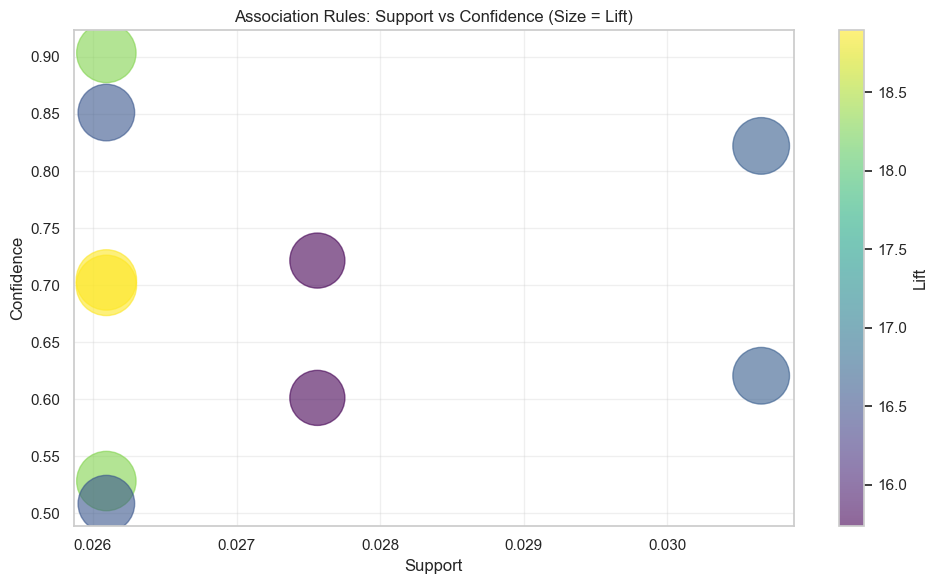

In [9]:
# Visualize top rules by lift
top_rules = rules.head(10)

plt.figure(figsize=(10, 6))
plt.scatter(top_rules['support'], top_rules['confidence'], 
            s=top_rules['lift']*100, alpha=0.6, c=top_rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (Size = Lift)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Interpretation

**Key Findings:**
Here is a brief, notebook-ready summary of the analysis in markdown.

---

### ## Market Basket Analysis: Key Insights & Actions

Based on the Apriori association rules, strong "collector behavior" was identified.

### ## ☕️ Most Interesting Rules

The strongest rules are not between different products, but between *variations* of the same product.

* **Rule 1: The Teacup Collection**
    * **Rule:** `{GREEN REGENCY TEACUP AND SAUCER}` -> `{ROSES REGENCY TEACUP AND SAUCER}`
    * **Confidence (80.1%):** If a customer buys a Green teacup, there's an 80% chance they will also buy the Roses one.
    * **Lift (15.6):** This purchase is 15.6 times more likely than a random co-purchase.
    * **Insight:** Customers are "collecting the set" (Green, Roses, and Pink).

* **Rule 2: The Jumbo Bag Collection**
    * **Rule:** `{JUMBO BAG PINK POLKADOT}` -> `{JUMBO BAG RED RETROSPOT}`
    * **Confidence (66.6%):** A customer buying the Pink bag has a 2/3 chance of also buying the Red one.
    * **Lift (12.3):** A very strong, non-random association.
    * **Insight:** This collector behavior also applies to the Jumbo Bag product line.

### ## 💼 Business Implications

* **High-Confidence Cross-Selling:** The 80% confidence rate for teacups is a highly predictable, bankable pattern.
* **Collector Behavior:** Customers are motivated by "completeness" (aesthetics, sets, gifts) rather than just utility.
* **Inventory & Stockout Risk:** A stockout in one item (e.g., Roses teacup) will directly and significantly harm the sales of its companion items (e.g., Green teacup).

### ## 📈 Recommended Actions

1.  **Create "Complete the Set" Bundles:**
    * Create a "Regency Teacup Trio" bundle (Green, Pink, Roses) on the website.
    * Offer a slight discount to encourage buying all three, locking in a higher Average Order Value (AOV).

2.  **Optimize Product Recommendations:**
    * On the `GREEN REGENCY TEACUP` product page, add a specific recommendation:
    * "**Complete your set:** Add the `ROSES TEACUP` (80% of customers do!) and the `PINK TEACUP`."
    * This uses social proof and directly targets the collector mindset.

3.  **Implement Paired Inventory Management:**
    * Link these SKUs in your inventory system. When re-ordering `GREEN` teacups, automatically check stock for `ROSES` and `PINK`.
    * Co-locate these items in the warehouse to speed up "pick and pack" times for these common multi-item orders.


---

## Task 2 — Clustering Analysis

In this task, we'll apply clustering algorithms to group similar data points together.


### Load Dataset for Clustering


In [ ]:
# TODO: Load your dataset for clustering
# Example: Customer segmentation, product features, etc.

# For demonstration, create sample data
# Replace this with your actual dataset loading
# df_cluster = pd.read_csv('your_dataset.csv')

# Select numeric features for clustering
# X = df_cluster.select_dtypes(include=[np.number])

# Remove any missing values
# X = X.dropna()

print("Dataset loaded and prepared for clustering")


### Determine Optimal Number of Clusters (Elbow Method)


In [ ]:
# Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Calculate within-cluster sum of squares (WCSS) for different k values
# k_range = range(2, 11)
# wcss = []

# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     kmeans.fit(X_scaled)
#     wcss.append(kmeans.inertia_)

# Plot elbow curve
# plt.figure(figsize=(10, 6))
# plt.plot(k_range, wcss, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
# plt.title('Elbow Method for Optimal k')
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

print("Elbow method completed")


### Apply K-Means Clustering


In [ ]:
# Choose optimal k based on elbow method
# optimal_k = 3  # Replace with your optimal k

# Apply K-means
# kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
# clusters_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
# df_cluster['cluster_kmeans'] = clusters_kmeans

# Print cluster centers
# print("Cluster Centers:")
# print(kmeans.cluster_centers_)

# Print cluster sizes
# print("\nCluster Sizes:")
# print(df_cluster['cluster_kmeans'].value_counts().sort_index())

print("K-means clustering completed")


### Visualize K-Means Clusters


In [ ]:
# Use PCA for 2D visualization if dataset has more than 2 features
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, 
#                      cmap='viridis', alpha=0.6, s=50)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
#            c='red', marker='x', s=200, linewidths=3, label='Centroids')
# plt.xlabel(f'First Principal Component (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
# plt.ylabel(f'Second Principal Component (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
# plt.title('K-Means Clustering Results')
# plt.colorbar(scatter, label='Cluster')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

print("Visualization completed")


### Apply DBSCAN Clustering


In [ ]:
# Apply DBSCAN
# eps = 0.5  # Maximum distance between samples in the same neighborhood
# min_samples = 5  # Minimum number of samples in a neighborhood

# dbscan = DBSCAN(eps=eps, min_samples=min_samples)
# clusters_dbscan = dbscan.fit_predict(X_scaled)

# Add cluster labels
# df_cluster['cluster_dbscan'] = clusters_dbscan

# Print number of clusters (excluding noise points labeled as -1)
# n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
# n_noise = list(clusters_dbscan).count(-1)

# print(f"Number of clusters: {n_clusters}")
# print(f"Number of noise points: {n_noise}")
# print(f"\nCluster Sizes:")
# print(pd.Series(clusters_dbscan).value_counts().sort_index())

print("DBSCAN clustering completed")


### Compare K-Means and DBSCAN


In [ ]:
# Create comparison visualization
# fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# # K-Means
# scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, 
#                           cmap='viridis', alpha=0.6, s=50)
# axes[0].set_title('K-Means Clustering')
# axes[0].set_xlabel('First Principal Component')
# axes[0].set_ylabel('Second Principal Component')
# axes[0].grid(True, alpha=0.3)

# # DBSCAN
# scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_dbscan, 
#                           cmap='viridis', alpha=0.6, s=50)
# axes[1].set_title('DBSCAN Clustering')
# axes[1].set_xlabel('First Principal Component')
# axes[1].set_ylabel('Second Principal Component')
# axes[1].grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

print("Comparison visualization completed")


### Interpretation

**Key Findings:**
- [Explain cluster characteristics]
- [Compare K-means vs DBSCAN results]
- [Discuss when to use each method]


---

## Task 3 — Classification with Decision Trees

In this task, we'll build and evaluate a decision tree classifier.


### Load Classification Dataset


In [ ]:
# TODO: Load your classification dataset
# Example: Iris, Wine Quality, Customer Churn, etc.

# For demonstration:
# df_classify = pd.read_csv('your_dataset.csv')

# Separate features and target
# X = df_classify.drop('target_column', axis=1)
# y = df_classify['target_column']

# Handle categorical variables if needed
# le = LabelEncoder()
# y = le.fit_transform(y)

print("Dataset loaded for classification")


### Split Data into Training and Testing Sets


In [ ]:
# Split the data
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# print(f"Training set size: {X_train.shape[0]}")
# print(f"Test set size: {X_test.shape[0]}")

print("Data split completed")


### Train Decision Tree Classifier


In [ ]:
# Train decision tree
# dt = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=10)
# dt.fit(X_train, y_train)

# Make predictions
# y_pred = dt.predict(X_test)

# Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Decision Tree Accuracy: {accuracy:.4f}")

print("Decision tree trained")


### Visualize Decision Tree


In [ ]:
# Visualize the decision tree
# plt.figure(figsize=(20, 10))
# plot_tree(dt, filled=True, feature_names=X.columns, 
#           class_names=[str(c) for c in np.unique(y)], fontsize=10)
# plt.title('Decision Tree Structure')
# plt.tight_layout()
# plt.show()

print("Tree visualization completed")


### Evaluate Model Performance


In [ ]:
# Calculate metrics
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-Score: {f1:.4f}")

# Print classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

print("Model evaluation completed")


### Confusion Matrix


In [ ]:
# Create confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=np.unique(y), yticklabels=np.unique(y))
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.tight_layout()
# plt.show()

print("Confusion matrix created")


### Feature Importance


In [ ]:
# Get feature importances
# feature_importance = pd.DataFrame({
#     'feature': X.columns,
#     'importance': dt.feature_importances_
# }).sort_values('importance', ascending=False)

# print("Feature Importances:")
# print(feature_importance)

# Visualize feature importance
# plt.figure(figsize=(10, 6))
# sns.barplot(data=feature_importance, x='importance', y='feature')
# plt.xlabel('Importance')
# plt.title('Feature Importance in Decision Tree')
# plt.tight_layout()
# plt.show()

print("Feature importance analysis completed")


### Experiment with Different Parameters


In [ ]:
# Test different max_depth values
# depths = [3, 5, 7, 10, 15]
# accuracies = []

# for depth in depths:
#     dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
#     dt_temp.fit(X_train, y_train)
#     y_pred_temp = dt_temp.predict(X_test)
#     accuracies.append(accuracy_score(y_test, y_pred_temp))

# plt.figure(figsize=(10, 6))
# plt.plot(depths, accuracies, marker='o')
# plt.xlabel('Max Depth')
# plt.ylabel('Accuracy')
# plt.title('Decision Tree Accuracy vs Max Depth')
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

print("Parameter experimentation completed")


### Interpretation

**Key Findings:**
- [Explain model performance]
- [Discuss most important features]
- [Analyze confusion matrix]
- [Recommend parameter settings]


---

## Task 4 — Anomaly Detection

In this task, we'll identify anomalous data points using different detection methods.


### Load Dataset for Anomaly Detection


In [ ]:
# TODO: Load your dataset for anomaly detection
# Example: Fraud detection, network intrusion, manufacturing defects, etc.

# For demonstration:
# df_anomaly = pd.read_csv('your_dataset.csv')

# Select features for anomaly detection
# X_anomaly = df_anomaly.select_dtypes(include=[np.number])

# Standardize features
# scaler_anomaly = StandardScaler()
# X_anomaly_scaled = scaler_anomaly.fit_transform(X_anomaly)

print("Dataset loaded for anomaly detection")


### Apply Isolation Forest


In [ ]:
# Apply Isolation Forest
# contamination = 0.1  # Expected proportion of anomalies (adjust based on your data)

# iso_forest = IsolationForest(contamination=contamination, random_state=42)
# anomalies_iso = iso_forest.fit_predict(X_anomaly_scaled)

# Convert to binary (1 = normal, -1 = anomaly)
# anomalies_iso_binary = (anomalies_iso == -1).astype(int)

# print(f"Number of anomalies detected: {sum(anomalies_iso_binary)}")
# print(f"Percentage of anomalies: {sum(anomalies_iso_binary) / len(anomalies_iso_binary) * 100:.2f}%")

print("Isolation Forest completed")


### Apply Local Outlier Factor (LOF)


In [ ]:
# Apply LOF
# n_neighbors = 20  # Number of neighbors to consider

# lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
# anomalies_lof = lof.fit_predict(X_anomaly_scaled)

# Convert to binary
# anomalies_lof_binary = (anomalies_lof == -1).astype(int)

# print(f"Number of anomalies detected: {sum(anomalies_lof_binary)}")
# print(f"Percentage of anomalies: {sum(anomalies_lof_binary) / len(anomalies_lof_binary) * 100:.2f}%")

print("LOF completed")


### Visualize Anomalies


In [ ]:
# Use PCA for 2D visualization
# pca_anomaly = PCA(n_components=2)
# X_anomaly_pca = pca_anomaly.fit_transform(X_anomaly_scaled)

# Create comparison visualization
# fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# # Isolation Forest
# scatter1 = axes[0].scatter(X_anomaly_pca[:, 0], X_anomaly_pca[:, 1], 
#                            c=anomalies_iso_binary, cmap='RdYlGn', alpha=0.6, s=50)
# axes[0].set_title('Isolation Forest Anomaly Detection')
# axes[0].set_xlabel('First Principal Component')
# axes[0].set_ylabel('Second Principal Component')
# axes[0].grid(True, alpha=0.3)

# # LOF
# scatter2 = axes[1].scatter(X_anomaly_pca[:, 0], X_anomaly_pca[:, 1], 
#                            c=anomalies_lof_binary, cmap='RdYlGn', alpha=0.6, s=50)
# axes[1].set_title('Local Outlier Factor Anomaly Detection')
# axes[1].set_xlabel('First Principal Component')
# axes[1].set_ylabel('Second Principal Component')
# axes[1].grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

print("Anomaly visualization completed")


### Compare Methods


In [ ]:
# Compare agreement between methods
# agreement = (anomalies_iso_binary == anomalies_lof_binary).sum()
# total = len(anomalies_iso_binary)

# print(f"Agreement between methods: {agreement}/{total} ({agreement/total*100:.2f}%)")

# Create comparison dataframe
# comparison_df = pd.DataFrame({
#     'Isolation Forest': anomalies_iso_binary,
#     'LOF': anomalies_lof_binary
# })

# print("\nComparison Summary:")
# print(comparison_df.sum())

print("Method comparison completed")


### Interpretation

**Key Findings:**
- [Explain detected anomalies]
- [Compare Isolation Forest vs LOF]
- [Discuss characteristics of anomalous points]


---

## Task 5 — Model Evaluation and Comparison

In this task, we'll compare multiple classification algorithms and select the best performing model.


### Train Multiple Classification Models


In [ ]:
# Train multiple models
# models = {
#     'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
#     'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
#     'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
# }

# results = {}

# for name, model in models.items():
#     # Train model
#     model.fit(X_train, y_train)
#     
#     # Make predictions
#     y_pred = model.predict(X_test)
#     
#     # Calculate metrics
#     results[name] = {
#         'Accuracy': accuracy_score(y_test, y_pred),
#         'Precision': precision_score(y_test, y_pred, average='weighted'),
#         'Recall': recall_score(y_test, y_pred, average='weighted'),
#         'F1-Score': f1_score(y_test, y_pred, average='weighted')
#     }

# Convert to DataFrame
# results_df = pd.DataFrame(results).T
# print("Model Comparison:")
# print(results_df.round(4))

print("Multiple models trained")


### Cross-Validation


In [ ]:
# Perform cross-validation
# cv_scores = {}

# for name, model in models.items():
#     scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
#     cv_scores[name] = {
#         'Mean': scores.mean(),
#         'Std': scores.std()
#     }

# cv_df = pd.DataFrame(cv_scores).T
# print("Cross-Validation Results:")
# print(cv_df.round(4))

print("Cross-validation completed")


### Visualize Model Comparison


In [ ]:
# Create comparison bar chart
# fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
# for idx, metric in enumerate(metrics):
#     ax = axes[idx // 2, idx % 2]
#     results_df[metric].plot(kind='bar', ax=ax, color='steelblue')
#     ax.set_title(f'{metric} Comparison')
#     ax.set_ylabel(metric)
#     ax.set_ylim([0, 1])
#     ax.grid(True, alpha=0.3, axis='y')
#     plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# plt.tight_layout()
# plt.show()

print("Comparison visualization completed")


### ROC Curve (for Binary Classification)


In [ ]:
# For binary classification only
# if len(np.unique(y)) == 2:
#     plt.figure(figsize=(10, 8))
#     
#     for name, model in models.items():
#         model.fit(X_train, y_train)
#         y_pred_proba = model.predict_proba(X_test)[:, 1]
#         fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')
#     
#     plt.plot([0, 1], [0, 1], 'k--', label='Random')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve Comparison')
#     plt.legend()
#     plt.grid(True, alpha=0.3)
#     plt.tight_layout()
#     plt.show()

print("ROC curve analysis completed")


### Select Best Model


In [ ]:
# Select best model based on F1-score (or your preferred metric)
# best_model_name = results_df['F1-Score'].idxmax()
# best_score = results_df.loc[best_model_name, 'F1-Score']

# print(f"Best Model: {best_model_name}")
# print(f"Best F1-Score: {best_score:.4f}")
# print(f"\nAll Metrics for Best Model:")
# print(results_df.loc[best_model_name])

print("Best model selected")


### Interpretation

**Key Findings:**
- [Compare model performances]
- [Explain why the selected model is best]
- [Discuss trade-offs between models]
- [Recommend model for deployment]


---

## Summary and Conclusions

This data mining exercise demonstrates essential techniques for pattern discovery and knowledge extraction:

1. **Association Rule Mining**: Discovered frequent patterns and relationships in transactional data
2. **Clustering**: Grouped similar data points using K-means and DBSCAN algorithms
3. **Classification**: Built and evaluated decision tree models for prediction
4. **Anomaly Detection**: Identified outliers using Isolation Forest and LOF methods
5. **Model Comparison**: Evaluated and compared multiple classification algorithms

**Key Insights:**
- [Summarize main findings]
- [Discuss practical applications]
- [Recommend next steps]
